### 1.

![title](1.jpeg)

In [1]:
import numpy as np

In [2]:
def relu(z):
    # z: output of linear function, any shape
    return np.maximum(0,z)

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def ff_nn_ReLu(x, W1, W2, b1, b2):
    z1 = np.dot(W1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    y = sigmoid(z2)
    return y

In [4]:
W1 = np.array([[1,-1,0],
               [0,0,0.5]]).T
W2 = np.array([[1,0,-1]])
b1 = np.array([[0, 0, 1]]).T
b2 = np.array([[1]])

X = np.array([[1,-1],[0,-1],[0,1]]).T  

In [5]:
X

array([[ 1,  0,  0],
       [-1, -1,  1]])

In [6]:
ff_nn_ReLu(X, W1, W2, b1, b2)

array([[0.81757448, 0.62245933, 0.37754067]])

### 2.

#### (1)

$dx = -3x^2 - 200*(y^2-x) = -3x^2+200x-200y^2$

$dy = 200 * 2y(y^2-x)=400y^3-400xy$


#### (2)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d

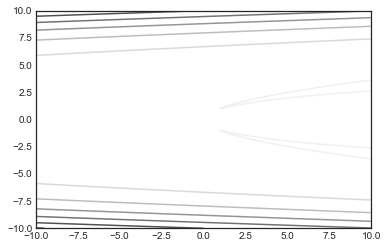

In [8]:
delta = 0.02
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100*(Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### (3)

##### learning rate = 0.0001

[0.01709992 0.24571757]


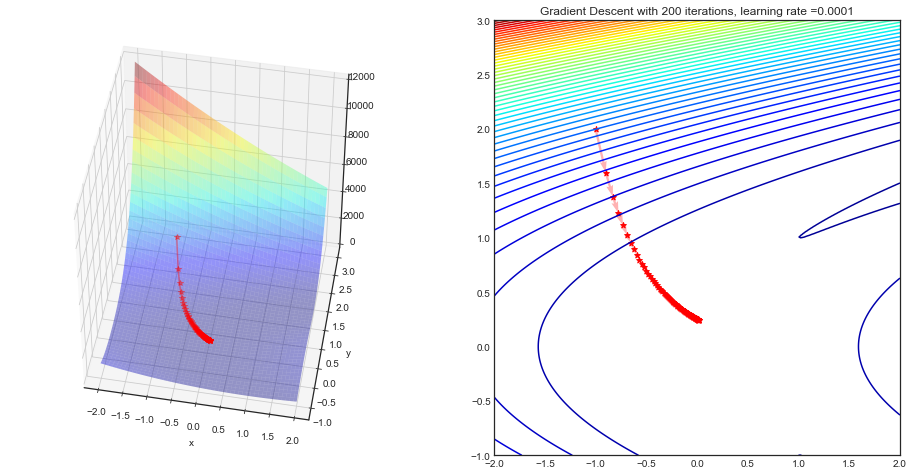

In [9]:
def Rosenbrock(x,y):
    return (1-x**3) + 100*(y**2-x)**2

def Grad_Rosenbrock(x,y):
    g1 = -3*x**2 + 200*x - 200*y**2 
    g2 = 400*y**3 - 400*x*y
    return np.array([g1,g2])

def Gradient_Descent(Grad,x,y, learning_rate = 0.1, epsilon=0.001, iteration = 50 ):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < iteration:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - learning_rate * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x,iter_y, iter_count

root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock,-1,2, 0.0001, 0.001, 200)

x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with 200 iterations, learning rate =0.0001')


plt.show()


##### learning rate = 0.001

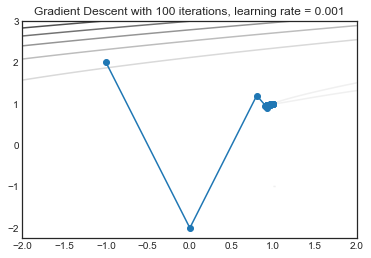

In [10]:
def grad_f(vector):
    x, y = vector
    df_dx =  -3*x**2 + 200*x - 200*y**2 
    df_dy = 400*y**3 - 400*x*y
    return np.array([df_dx, df_dy])
def grad_descent(starting_point=None, iterations=50, learning_rate=1):
    if all(starting_point):
        point = starting_point
    else:
        point = np.random.uniform(-2,2,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent(starting_point=np.array([-1,2]),iterations=50, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_title('Gradient Descent with 100 iterations, learning rate = 0.001')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

##### learning rate = 0.01

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


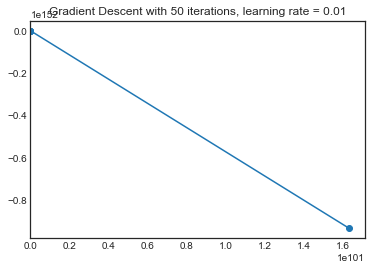

In [11]:
np.random.seed(10)
traj = grad_descent(starting_point=np.array([-1,2]),iterations=50, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
ax.set_title('Gradient Descent with 50 iterations, learning rate = 0.01')
plt.plot(x,y,'-o')

#### (4)

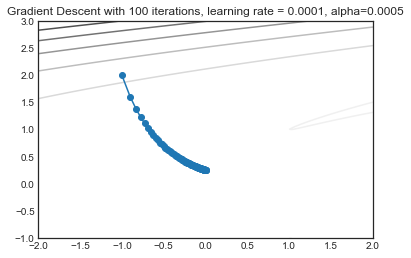

In [12]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.1, epsilon=10):
    if all(starting_point):
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=np.array([-1,2]),iterations=100, epsilon=0.0001, alpha=.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
ax.set_title('Gradient Descent with 100 iterations, learning rate = 0.0001, alpha=0.0005')
plt.plot(x,y,'-o')

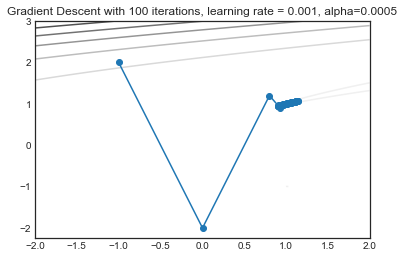

In [13]:
np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=np.array([-1,2]),iterations=100, epsilon=0.001, alpha=.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
ax.set_title('Gradient Descent with 100 iterations, learning rate = 0.001, alpha=0.0005')
plt.plot(x,y,'-o')

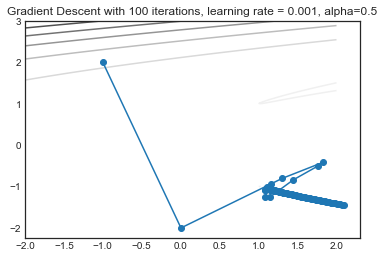

In [14]:
np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=np.array([-1,2]),iterations=100, epsilon=0.001, alpha=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
ax.set_title('Gradient Descent with 100 iterations, learning rate = 0.001, alpha=0.5')
plt.plot(x,y,'-o')

#### 3.


![title](2.jpeg)

#### (2)

In [15]:
def backward_propagation(parameters, X, Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

#### (3)

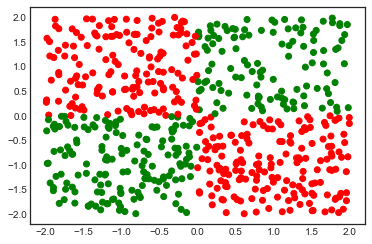

In [16]:
np.random.seed(2)
x = np.random.uniform(low=-2,high=2,size=1200).reshape((2,600))
y=np.zeros(600)
y[np.logical_and(x[0,:]>0 , x[1,:]>0)]=1
y[np.logical_and(x[0,:]<0 , x[1,:]<0)]=1

color = []
for i in range(600):
    if y[i] == 0:
        color.append('r')
    else: color.append('g')
plt.scatter(x[0,:],x[1,:],c=color)

y = y.reshape((1,600))

#### (4)

In [17]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(20) 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(1, n_h) * 0.01
    b2 = np.zeros(shape=(1, 1))
    parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    return parameters

def compute_cost(A2, Y):
    m = Y.shape[1] # number of example
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m 
    cost = np.squeeze(cost)      
    return cost

def update_parameters(parameters, grads, learning_rate=0.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def nn_model(X, Y, n_h, num_iterations=1000, learning_rate=0.01):    
    parameters = initialize_parameters(X.shape[0], n_h, Y.shape[0])
    c = []
    for i in range(0, num_iterations):
        # Forward propagation
        A2 = ff_nn_ReLu(X, parameters['W1'], parameters['W2'], parameters['b1'], parameters['b2'])
        
        # Cost function
        cost = compute_cost(A2, Y)
        # Print the cost every 1000 iterations
        if i % 100 == 0:
            c.append(cost)
 
        # Backpropagation
        grads = backward_propagation(parameters, X, Y)
 
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads,learning_rate)
    
    return parameters,c

Text(0.5, 1.0, 'Total Loss')

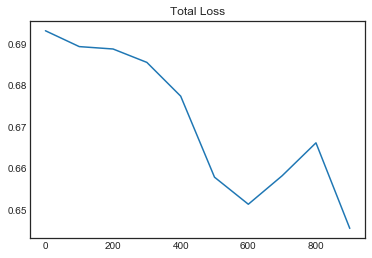

In [18]:
parameters, cost = nn_model(x,y,3,num_iterations=1000,learning_rate=0.2)
iteration = [i*100 for i in range(10)]
fig, ax = plt.subplots()
plt.plot(iteration, cost)
ax.set_title('Total Loss')

#### (5)

In [19]:
def nn_model_Momentum(X, Y, n_h, num_iterations=10000, alpha=0.001, epsilon=0.1):    
    parameters = initialize_parameters(X.shape[0], n_h, Y.shape[0])
    c = [] # store cost
    v1 = np.zeros((3,2))
    v2 = np.zeros((1,3))
    c1 = np.zeros((3,1))
    c2 = np.zeros((1,1))
    for i in range(0, num_iterations):
        # Forward propagation
        A2 = ff_nn_ReLu(X, parameters['W1'], parameters['W2'], parameters['b1'], parameters['b2'])
        
        # Cost function
        cost = compute_cost(A2, Y)
        # Print the cost every 1000 iterations
        if i % 100 == 0:
            c.append(cost)
 
        # Backpropagation
        grads = backward_propagation(parameters, X, Y)
 
        # Gradient descent parameter update 
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        dW1 = grads['dW1']
        db1 = grads['db1']
        dW2 = grads['dW2']
        db2 = grads['db2']

        v1 = alpha*v1 + epsilon*dW1
        W1 = W1 - v1

        c1 = alpha*c1 + epsilon*db1
        b1 = b1 - c1

        v2 = alpha*v2 + epsilon*dW2
        W2 = W2 - v2

        c2 = alpha*c2 + epsilon*db2
        b2 = b2 - c2

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}
    
      
    return parameters,c


Text(0.5, 1.0, 'Total Loss Using Momentum')

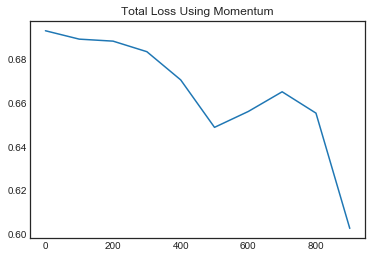

In [20]:
parameters2, cost2 = nn_model_Momentum(x,y,3,num_iterations=1000, alpha=0.1,epsilon=0.2)
iteration = [i*100 for i in range(10)]
fig, ax = plt.subplots()
plt.plot(iteration, cost2)
ax.set_title('Total Loss Using Momentum')

In [21]:
cost[-1] # use gradient descent

0.6454974524186274

In [22]:
cost2[-1] # use momentum

0.6026570245264562

The final result is very close, but it is slightly better than Gradient Descent.

#### (6)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

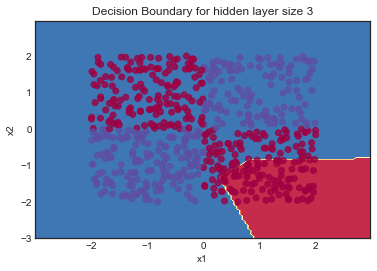

In [23]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.05
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.array([xx.ravel(), yy.ravel()]))
    Z = Z >= 0.5
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral,  alpha=0.8)
    return Z
    
z=plot_decision_boundary(lambda x: ff_nn_ReLu(x, parameters['W1'], parameters['W2'], parameters['b1'], parameters['b2']), x, y)
plt.title("Decision Boundary for hidden layer size " + str(3))